<a href="https://colab.research.google.com/github/apoorva653/apoorva653/blob/main/neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

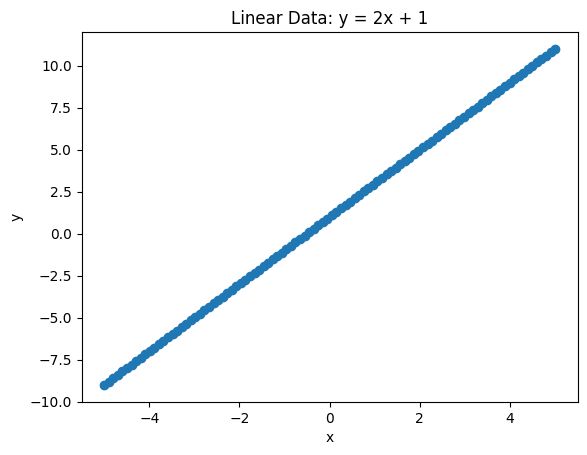

In [4]:
# Linear Data
x_linear = torch.unsqueeze(torch.linspace(-5, 5, 100), dim=1)
y_linear = 2 * x_linear + 1

plt.scatter(x_linear.numpy(), y_linear.numpy())
plt.title("Linear Data: y = 2x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



In [12]:
slp_linear = nn.Linear(1, 1)   # nn.Linear(in_features, out_features)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(slp_linear.parameters(), lr=0.01)
for param in slp_linear.parameters():
  print(param)

Parameter containing:
tensor([[0.0258]], requires_grad=True)
Parameter containing:
tensor([0.3466], requires_grad=True)


In [8]:
# train the model

for epoch in range(200):
    y_pred = slp_linear(x_linear)
    loss = criterion(y_pred, y_linear)       #y_linear -- actual output

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 18.8231
Epoch 20, Loss: 0.8525
Epoch 40, Loss: 0.3756
Epoch 60, Loss: 0.1674
Epoch 80, Loss: 0.0746
Epoch 100, Loss: 0.0333
Epoch 120, Loss: 0.0148
Epoch 140, Loss: 0.0066
Epoch 160, Loss: 0.0029
Epoch 180, Loss: 0.0013


In [9]:
# parameter after training

print("\nTrained Parameters:")
for param in slp_linear.parameters():
    print(param)



Trained Parameters:
Parameter containing:
tensor([[2.0000]], requires_grad=True)
Parameter containing:
tensor([0.9758], requires_grad=True)


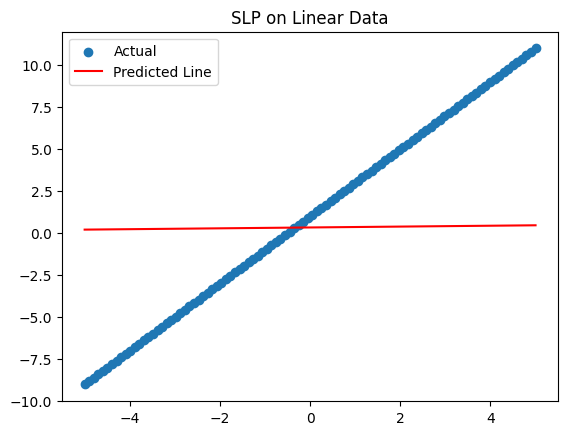

In [23]:
# plot prediction

plt.scatter(x_linear.numpy(), y_linear.numpy(), label="Actual")
plt.plot(x_linear.numpy(),
         slp_linear(x_linear).detach().numpy(),
         color="red", label="Predicted Line")

plt.title('SLP on Linear Data')
plt.legend()
plt.show()

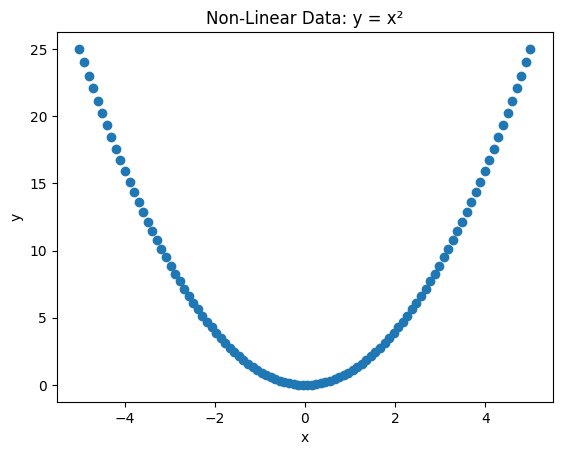

In [25]:
# non- linear code

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100).unsqueeze(1)
y = x ** 2
plt.scatter(x.numpy(), y.numpy())
plt.title("Non-Linear Data: y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [44]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 10),   # hidden layer
            nn.ReLU(),
            nn.Linear(10, 1)    # output layer
        )

    def forward(self, x):
        return self.net(x)
model = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 117.5531
Epoch 100, Loss: 11.4707
Epoch 200, Loss: 5.2994
Epoch 300, Loss: 2.3055
Epoch 400, Loss: 1.0698
Epoch 500, Loss: 0.6007
Epoch 600, Loss: 0.3850
Epoch 700, Loss: 0.2552
Epoch 800, Loss: 0.1718
Epoch 900, Loss: 0.1208


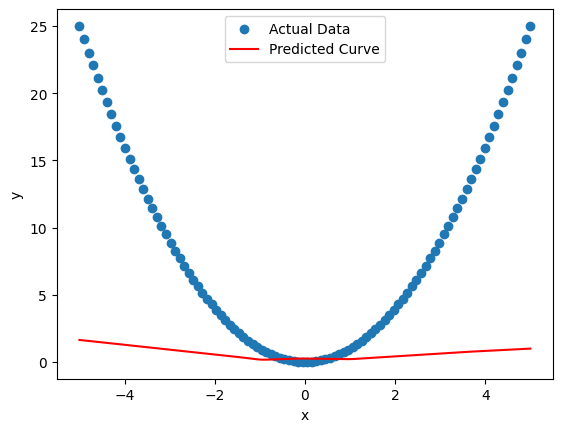

In [43]:
plt.scatter(x.numpy(), y.numpy(), label="Actual Data")
plt.plot(x.numpy(),
         model(x).detach().numpy(),
         color="red", label="Predicted Curve")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


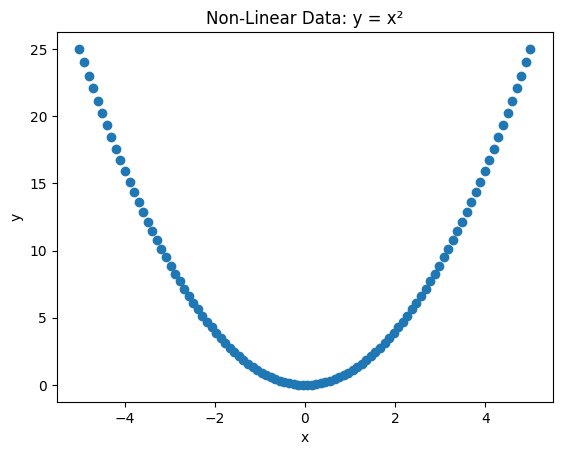

Epoch 0, Loss: 123.6899
Epoch 400, Loss: 21.1854
Epoch 800, Loss: 3.0246
Epoch 1200, Loss: 0.8741


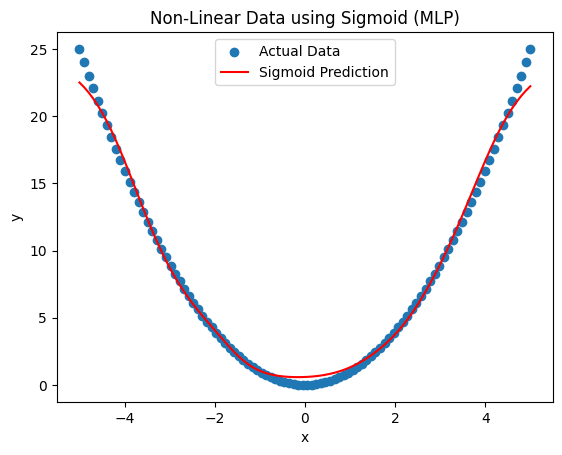

In [59]:
# segmoid function (non linear )

import torch
import torch.nn as nn
import matplotlib.pyplot as plt


x = torch.linspace(-5, 5, 100).unsqueeze(1)
y = x ** 2

plt.scatter(x.numpy(), y.numpy())
plt.title("Non-Linear Data: y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


class MLP_Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.Sigmoid(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.net(x)

model = MLP_Sigmoid()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


for epoch in range(1500):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 400 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


plt.scatter(x.numpy(), y.numpy(), label="Actual Data")
plt.plot(x.numpy(),
         model(x).detach().numpy(),
         color="red", label="Sigmoid Prediction")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linear Data using Sigmoid (MLP)")
plt.legend()
plt.show()


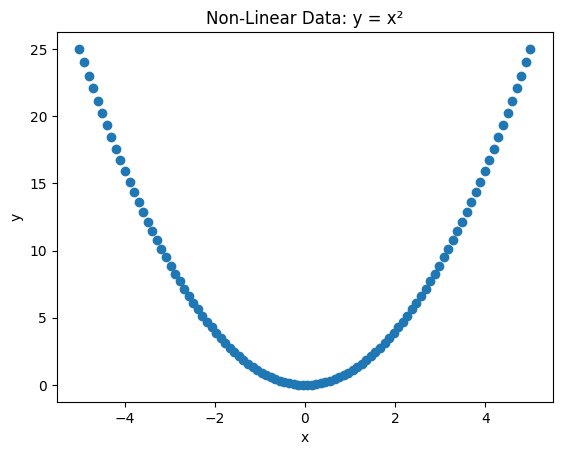

Epoch 0, Loss: 126.1183
Epoch 300, Loss: 32.1423
Epoch 600, Loss: 10.3708
Epoch 900, Loss: 7.9310
Epoch 1200, Loss: 6.0432


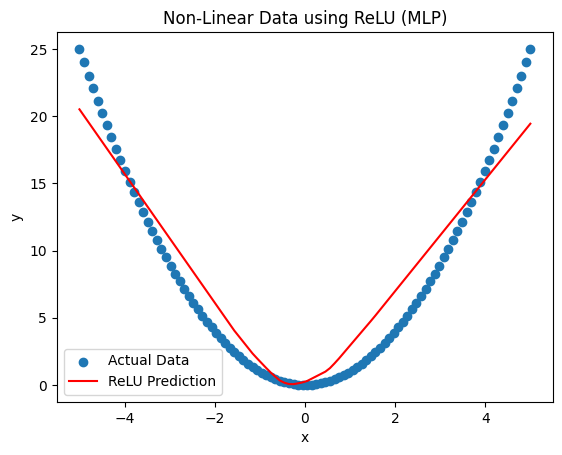

In [114]:
# ReLU function (non-linear)

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# non-linear data
x = torch.linspace(-5, 5, 100).unsqueeze(1)
y = x ** 2

plt.scatter(x.numpy(), y.numpy())
plt.title("Non-Linear Data: y = x²")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# MLP with ReLU
class MLP_ReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.net(x)

model = MLP_ReLU()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1500):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 300 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Plot results
plt.scatter(x.numpy(), y.numpy(), label="Actual Data")
plt.plot(x.numpy(),
         model(x).detach().numpy(),
         color="red", label="ReLU Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linear Data using ReLU (MLP)")
plt.legend()
plt.show()


Epoch 0, Loss: 119.680801
Epoch 200, Loss: 56.245045
Epoch 400, Loss: 45.624512
Epoch 600, Loss: 40.144272
Epoch 800, Loss: 37.781185


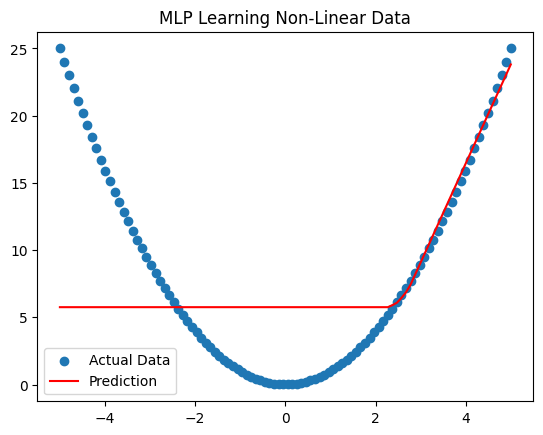

In [110]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x ** 2

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


mlp = nn.Sequential(
    nn.Linear(1, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)


optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)


criterion = nn.MSELoss()


for epoch in range(1000):
    y_pred = mlp(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


plt.scatter(x.numpy(), y.numpy(), label="Actual Data")
plt.plot(x.numpy(), mlp(x).detach().numpy(), color="red", label="Prediction")
plt.title("MLP Learning Non-Linear Data")
plt.legend()
plt.show()


[x^2] Epoch 0, Loss: 129.014252
[x^2] Epoch 200, Loss: 0.188463
[x^2] Epoch 400, Loss: 0.020162
[x^2] Epoch 600, Loss: 0.006432
[x^2] Epoch 800, Loss: 0.020350


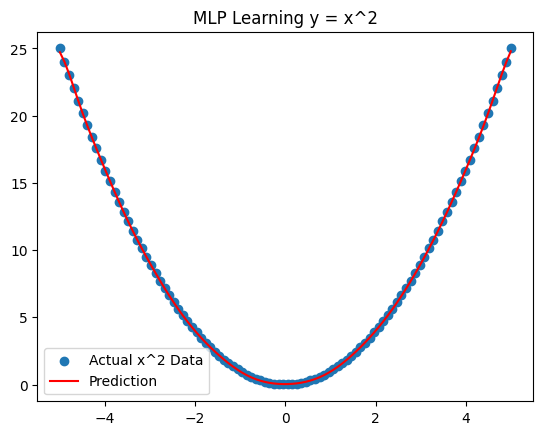

[sin(x)] Epoch 0, Loss: 245.020416
[sin(x)] Epoch 200, Loss: 0.497846
[sin(x)] Epoch 400, Loss: 0.398037
[sin(x)] Epoch 600, Loss: 0.373886
[sin(x)] Epoch 800, Loss: 0.359123


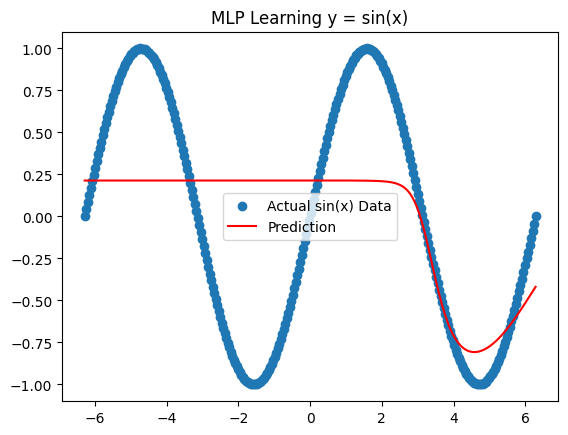

In [117]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x ** 2

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

mlp = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = mlp(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"[x^2] Epoch {epoch}, Loss: {loss.item():.6f}")

plt.scatter(x.numpy(), y.numpy(), label="Actual x^2 Data")
plt.plot(x.numpy(), mlp(x).detach().numpy(), color="red", label="Prediction")
plt.title("MLP Learning y = x^2")
plt.legend()
plt.show()


x = torch.unsqueeze(torch.linspace(-2*np.pi, 2*np.pi, 300), dim=1)
y = torch.sin(x)


for epoch in range(1000):
    y_pred = mlp(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"[sin(x)] Epoch {epoch}, Loss: {loss.item():.6f}")

plt.scatter(x.numpy(), y.numpy(), label="Actual sin(x) Data")
plt.plot(x.numpy(), mlp(x).detach().numpy(), color="red", label="Prediction")
plt.title("MLP Learning y = sin(x)")
plt.legend()
plt.show()
